<a href="https://colab.research.google.com/github/Rosemegan/python/blob/main/Copy_of_Final_python_assessment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
#Guessing game
#Generating random numbers
import random

def valid_guess():
    guess = input("Guess a number between 1 and 100: ")
    if guess.isdigit():
        return int(guess)
    else:
        return None
def play_game():
    correct_number = random.randint(1, 100) #Generating random number
    maximum_attempts = 5

    print("Welcome to the game. Please enter a number between 1 and 100 ")

    for attempt in range(1, maximum_attempts + 1):
        guess = valid_guess()

        if guess is None:
            print("Your number is invalid. Please enter another number")
            continue

        if guess == correct_number:
            print("Woow! You guessed correctly..Kudoos!!!!")
            return

        difference = abs(guess - correct_number)
        feedback = "You were very close!!" if difference <= 5 else "Oops..you didn't get it correctly..there is a big difference"
        print(feedback," Your difference is", difference, "Attempts left:", maximum_attempts - attempt)

    print("Game is over!!The correct number is", correct_number)

play_game()


Welcome to the game. Please enter a number between 1 and 100 
Guess a number between 1 and 100: 45
Oops..you didn't get it correctly..there is a big difference  Your difference is 46 Attempts left: 4
Guess a number between 1 and 100: 92
You were very close!!  Your difference is 1 Attempts left: 3
Guess a number between 1 and 100: 94
You were very close!!  Your difference is 3 Attempts left: 2
Guess a number between 1 and 100: 96
You were very close!!  Your difference is 5 Attempts left: 1
Guess a number between 1 and 100: 97
Oops..you didn't get it correctly..there is a big difference  Your difference is 6 Attempts left: 0
Game is over!!The correct number is 91


In [19]:
import pandas as pd

df = pd.read_csv("/content/test (1).csv") #loading data
print(df.head())
print(df.info())

  POSTED_BY  UNDER_CONSTRUCTION  RERA  BHK_NO. BHK_OR_RK    SQUARE_FT  \
0     Owner                   0     0        1       BHK   545.171340   
1    Dealer                   1     1        2       BHK   800.000000   
2    Dealer                   0     0        2       BHK  1257.096513   
3    Dealer                   0     0        3       BHK  1400.329489   
4     Owner                   0     0        1       BHK   430.477830   

   READY_TO_MOVE  RESALE             ADDRESS  LONGITUDE   LATITUDE  
0              1       1        Kamrej,Surat  21.262000  73.047700  
1              0       0     Panvel,Lalitpur  18.966114  73.148278  
2              1       1    New Town,Kolkata  22.592200  88.484911  
3              1       1  Kalwar Road,Jaipur  26.988300  75.584600  
4              1       1   Mai Mandir,Nadiad  22.700000  72.870000  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68720 entries, 0 to 68719
Data columns (total 11 columns):
 #   Column              Non-Null Coun

In [21]:
import pandas as pd
df1 = pd.read_csv("/content/train - train.csv")
print(df1.head())
print(df1.info())

  POSTED_BY  UNDER_CONSTRUCTION  RERA  BHK_NO. BHK_OR_RK    SQUARE_FT  \
0     Owner                   0     0        2       BHK  1300.236407   
1    Dealer                   0     0        2       BHK  1275.000000   
2     Owner                   0     0        2       BHK   933.159722   
3     Owner                   0     1        2       BHK   929.921143   
4    Dealer                   1     0        2       BHK   999.009247   

   READY_TO_MOVE  RESALE                      ADDRESS  LONGITUDE   LATITUDE  \
0              1       1        Ksfc Layout,Bangalore  12.969910  77.597960   
1              1       1    Vishweshwara Nagar,Mysore  12.274538  76.644605   
2              1       1             Jigani,Bangalore  12.778033  77.632191   
3              1       1  Sector-1 Vaishali,Ghaziabad  28.642300  77.344500   
4              0       1             New Town,Kolkata  22.592200  88.484911   

   TARGET(PRICE_IN_LACS)  
0                   55.0  
1                   51.0  
2    

In [22]:
# Handling missing values

df = df.dropna()  # Dropping rows with missing values
print(df.info())
df1 = df1.dropna() # Dropping missing values
print(df1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68720 entries, 0 to 68719
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   POSTED_BY           68720 non-null  object 
 1   UNDER_CONSTRUCTION  68720 non-null  int64  
 2   RERA                68720 non-null  int64  
 3   BHK_NO.             68720 non-null  int64  
 4   BHK_OR_RK           68720 non-null  object 
 5   SQUARE_FT           68720 non-null  float64
 6   READY_TO_MOVE       68720 non-null  int64  
 7   RESALE              68720 non-null  int64  
 8   ADDRESS             68720 non-null  object 
 9   LONGITUDE           68720 non-null  float64
 10  LATITUDE            68720 non-null  float64
dtypes: float64(3), int64(5), object(3)
memory usage: 5.8+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29451 entries, 0 to 29450
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------               

In [23]:
from sklearn.preprocessing import StandardScaler

features = df.drop(["SQUARE_FT", "POSTED_BY"], axis=1)
target = df["SQUARE_FT"]

numerical_features = features.select_dtypes(include=['number']) # Selects only numerical features
scaler = StandardScaler()
scaled_numeric_features = scaler.fit_transform(numerical_features)

scaled_features = pd.DataFrame(scaled_numeric_features, columns=numerical_features.columns, index=features.index)

features = pd.concat([scaled_features, features.select_dtypes(exclude=['number'])], axis=1)

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=40)


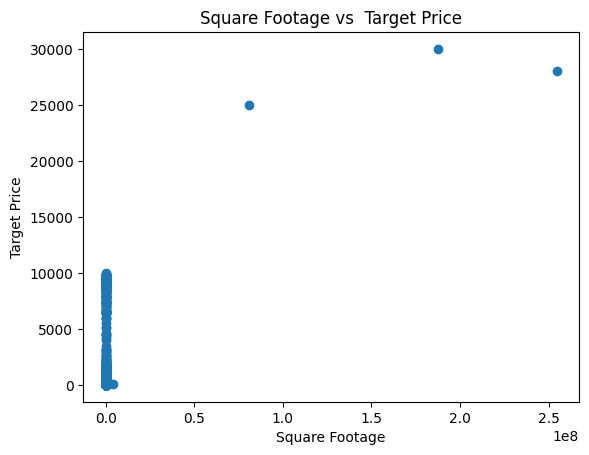

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot
plt.scatter(df1['SQUARE_FT'], df1['TARGET(PRICE_IN_LACS)'])
plt.xlabel("Square Footage")
plt.ylabel("Target Price")
plt.title("Square Footage vs  Target Price")
plt.show()



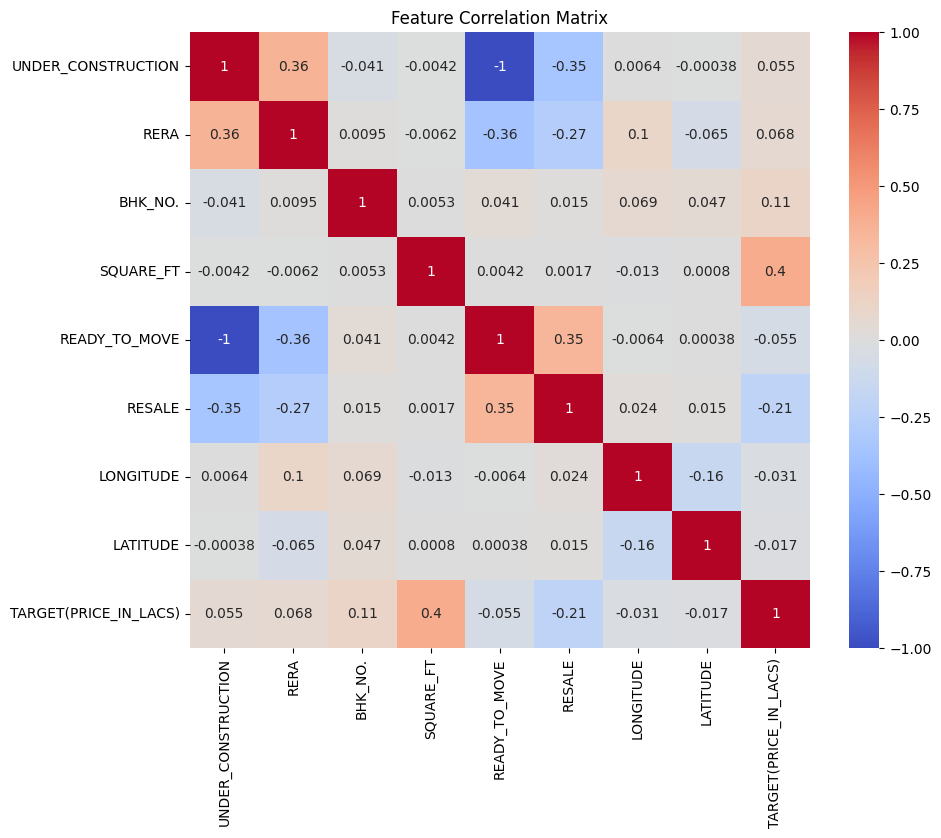

In [26]:
#Correlation Matrix

plt.figure(figsize=(10, 8))
numeric_df1 = df1.select_dtypes(include=['number'])
sns.heatmap(numeric_df1.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()

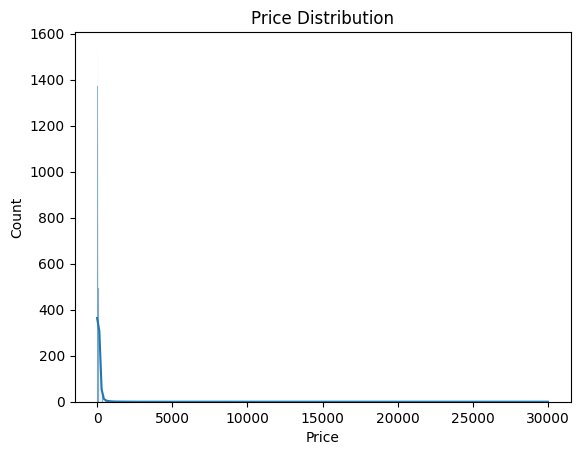

In [27]:
# Plot 3: Distribution of prices
Price = 'TARGET(PRICE_IN_LACS)'
sns.histplot(df1[Price], kde=True)
plt.xlabel("Price")
plt.title("Price Distribution")
plt.show()

In [28]:

from sklearn.metrics import mean_squared_error, r2_score
from sklearn import linear_model
# Initialize the mode
model =linear_model.LinearRegression()



In [29]:
#Fitting the model
X = df1[['SQUARE_FT']]
y = df1[['TARGET(PRICE_IN_LACS)']]
model.fit(X, y)


LinearRegression()

In [30]:
model.score(X, y)

0.1621549179647508

In [31]:

X_test = X[['SQUARE_FT']]
y_pred = model.predict(X_test)

In [32]:

mse = mean_squared_error(y, y_pred)
print("Mean Squared Error:",mse)


r2 = r2_score(y, y_pred)
print("R-squared:", r2)


Mean Squared Error: 361511.4016350756
R-squared: 0.1621549179647508


In [33]:
#Co-efficients of the linear regression model
model.coef_

array([[0.00013912]])

In [34]:
print("Model Performance:")
print("Mean Squared Error:",mse)
print("R-squared:",r2)


Model Performance:
Mean Squared Error: 361511.4016350756
R-squared: 0.1621549179647508


In [35]:
model.predict(X_test[:5])

array([[140.32473665],
       [140.32122573],
       [140.27366854],
       [140.27321799],
       [140.2828296 ]])

In [37]:
import pandas as pd
comparison = pd.DataFrame({"Actual": y[:5].values.ravel(), "Predicted": y_pred[:5].ravel()})
print(comparison)
# The model is not accurate at all because the actual and predicted values have a very big difference so it needs a lot of improvement
#The model performed poorly

   Actual   Predicted
0    55.0  140.324737
1    51.0  140.321226
2    43.0  140.273669
3    62.5  140.273218
4    60.5  140.282830
